# **Project Name** - Heart Disease prediction with Machine Learning

 Project Type - Classification

 Contribution - Individual

 Member Name - Hari Kumar reddy

## Importing Libraries

In [2]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import pandas as pd
import numpy as np

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import LabelEncoder from sklearn to convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import GaussianNB

# Import evaluation metric libraries
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score ,confusion_matrix

# Library used to Save and load ML models quickly
import pickle


# Import Warnings

In [3]:
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the Dataset
df=pd.read_csv('/content/heart.csv')
print(df.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


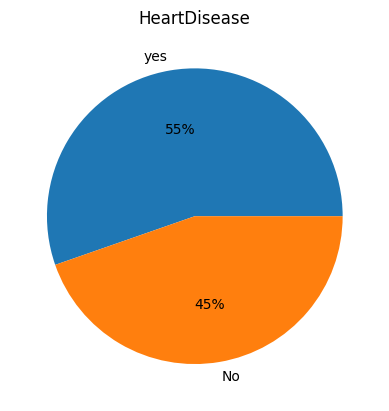

In [5]:
### Create a plot to display the percentage of the positive and negative heart disease
labels = ['yes', 'No']
values = df['HeartDisease'].value_counts().values
##
plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('HeartDisease')
plt.show()
##

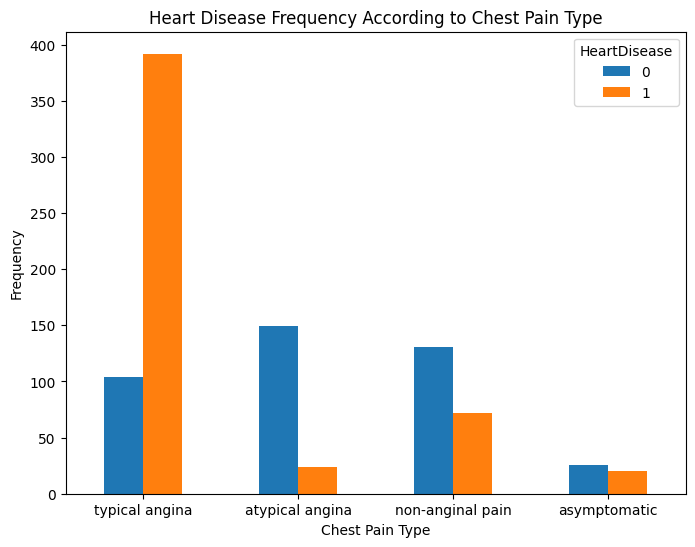

In [6]:
### Display chest pain types based on the Heart Disease
pd.crosstab(df.ChestPainType,df.HeartDisease).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [7]:
### Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))

Min age:  28
Max age:  77


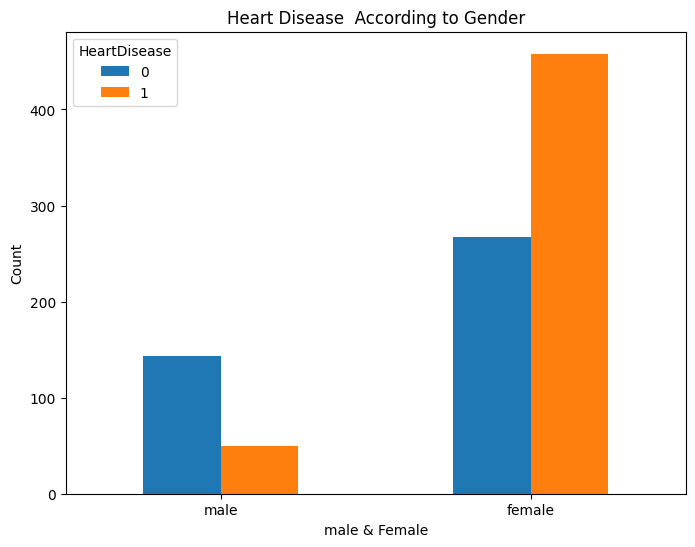

In [8]:
##
### Display Heart Disease  According to Gender
pd.crosstab(df.Sex,df.HeartDisease).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease  According to Gender')
plt.xlabel('male & Female')
plt.xticks(np.arange(2), ('male', 'female'), rotation = 0)
plt.ylabel('Count')
plt.show()
##

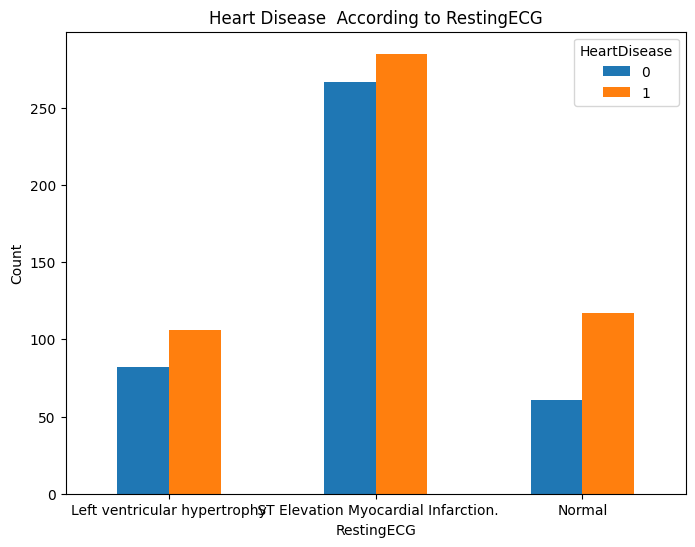

In [9]:
#
### Display Heart Disease  According to RestingECG
pd.crosstab(df.RestingECG,df.HeartDisease).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease  According to RestingECG')
plt.xlabel('RestingECG')
plt.xticks(np.arange(3), ('Left ventricular hypertrophy', ' ST Elevation Myocardial Infarction.', 'Normal'), rotation = 0)
plt.ylabel('Count')
plt.show()
##

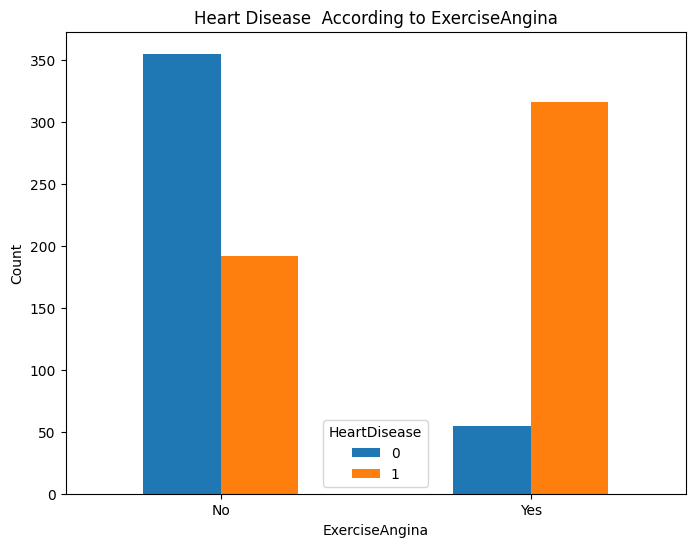

In [10]:
#
### Display Heart Disease  According to ExerciseAngina
pd.crosstab(df.ExerciseAngina,df.HeartDisease).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease  According to ExerciseAngina')
plt.xlabel('ExerciseAngina')
plt.xticks(np.arange(2), ( 'No','Yes'), rotation = 0)
plt.ylabel('Count')
plt.show()
##

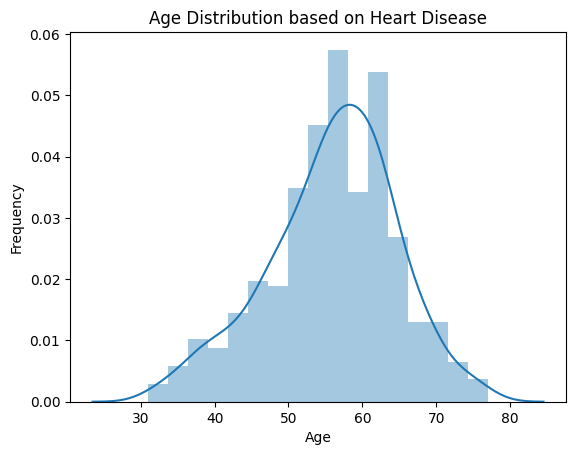

In [11]:

##
### Display age distribution based on heart disease
sns.distplot(df[df['HeartDisease'] == 1]['Age'], label='Have heart disease')
sns.distplot(df[df['HeartDisease'] == 2]['Age'], label = 'Do not have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on Heart Disease')
plt.show()
##

In [12]:
#Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['HeartDisease'] == 1]['Age']))
print('Max age of people who do not have heart disease: ', max(df[df['HeartDisease'] == 1]['Age']))

Min age of people who do not have heart disease:  31
Max age of people who do not have heart disease:  77


In [13]:

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode categorical columns into numerical values
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

print(df.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [14]:
# Define the feature matrix (X) by dropping the target column 'HeartDisease'
x = df.drop(columns=['HeartDisease'])

# Define the target variable (y) which contains only the 'HeartDisease' column
y = df['HeartDisease']

print(x)
print(y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [15]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

print(x_test)
print(y_test)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
476   51    1              0        132          218          1           0   
244   48    1              0        160          268          0           1   
701   62    1              1        128          208          1           0   
634   40    1              3        140          199          0           1   
687   70    1              1        156          245          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
33    41    1              0        130          172          0           2   
673   59    0              0        174          249          0           1   
146   42    1              1        120          198          0           1   
625   59    1              0        135          234          0           1   
860   60    1              0        130          253          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
476

In [16]:

# Create an instance of the Gaussian Naive Bayes classifier
NB = GaussianNB()

# Train the Naive Bayes model using the training dataset
NB.fit(x_train, y_train)


GaussianNB()

In [17]:
# Predict the target values using the trained Naive Bayes model
y_pred = NB.predict(x_test)

# Calculate and print the accuracy of the model
print('Naive Bayes ACCURACY is', accuracy_score(y_test, y_pred))

Naive Bayes ACCURACY is 0.8586956521739131


In [18]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[72 16]
 [10 86]]


In [19]:
# Predict the outcome for a single test case using the trained Naive Bayes model
testPrediction = NB.predict([[19, 1, 4, 120, 166, 0, 1, 138, 0, 0, 2]])

# Check the predicted value and print the result accordingly
if testPrediction == 1:
    print("The Patient Has Heart Disease, please consult a doctor.")
else:
    print("The Patient is Normal.")


The Patient is Normal.


In [20]:



# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Precision: 0.8431372549019608
Recall: 0.8958333333333334
F1 Score: 0.8686868686868687


In [21]:
# Dump to a file
with open('NB.pkl','wb') as file:
  pickle.dump(NB,file)